In [ ]:
!pip install seaborn


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Downloads/complaints.csv")

<ipython-input-2-eec67a3725ad>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Downloads/complaints.csv")


In [3]:
print(len(df))
df.head(5)


5251126


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",MI,48228,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025658
1,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30315,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025656
2,2024-05-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,FL,33139,NaN,NaN,Web,2024-05-04,In progress,Yes,NaN,8924799
3,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30144,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025651
4,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CT,06040,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025643


In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 3
Sub-issue                        736321
Consumer complaint narrative    3411704
Company public response         2733501
Company                               0
State                             45801
ZIP code                          30225
Tags                            4764840
Consumer consent provided?      1042778
Submitted via                         0
Date sent to company                  0
Company response to consumer         15
Timely response?                      0
Consumer disputed?              4482810
Complaint ID                          0
dtype: int64

In [6]:
df = df.drop(columns=["Sub-product","Sub-issue","Consumer complaint narrative","Company public response","Tags","Consumer consent provided?","Consumer disputed?"], axis=1)


In [7]:
df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [8]:
#As the given column has categorical value filling it up with mode
df['Issue'].fillna(df['Issue'].mode()[0],inplace=True)
df['Company response to consumer'].fillna(df['Company response to consumer'].mode()[0],inplace=True)
df['State'].fillna(df['State'].mode()[0],inplace=True)



In [12]:
#filling zip code using groupby because it can be related to state
df['ZIP code'] = df.groupby('State')['ZIP code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 99999))


**Distribution of Complaints Over Time**

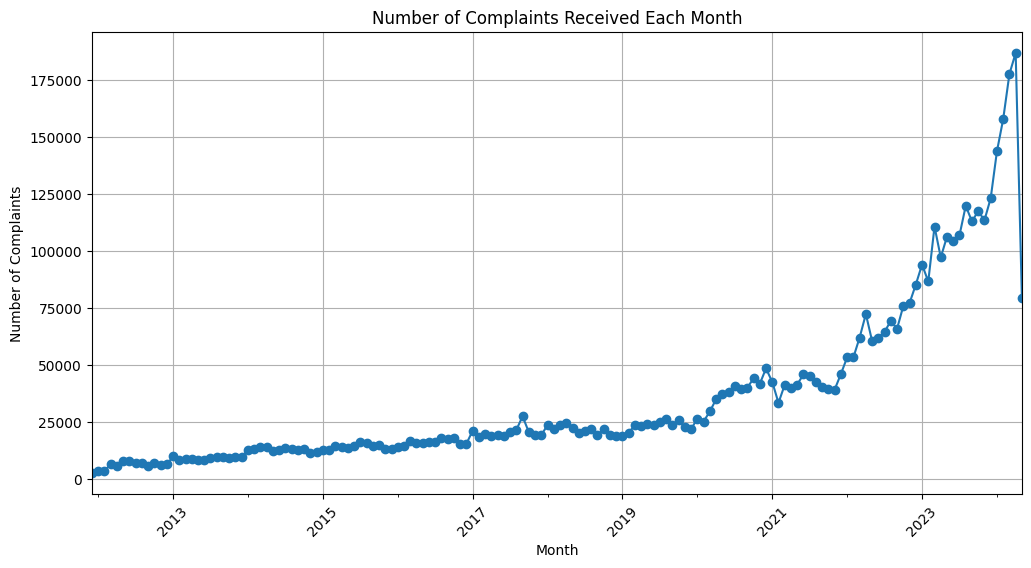

In [19]:
# Converting 'Date received' to datetime
df['Date received'] = pd.to_datetime(df['Date received'])
# Grouping by month and counting complaints
monthly_complaints = df.groupby(df['Date received'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
monthly_complaints.plot(kind='line', marker='o')
plt.title('Number of Complaints Received Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Most Common Issues**

<ipython-input-44-2dfead1ac40a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


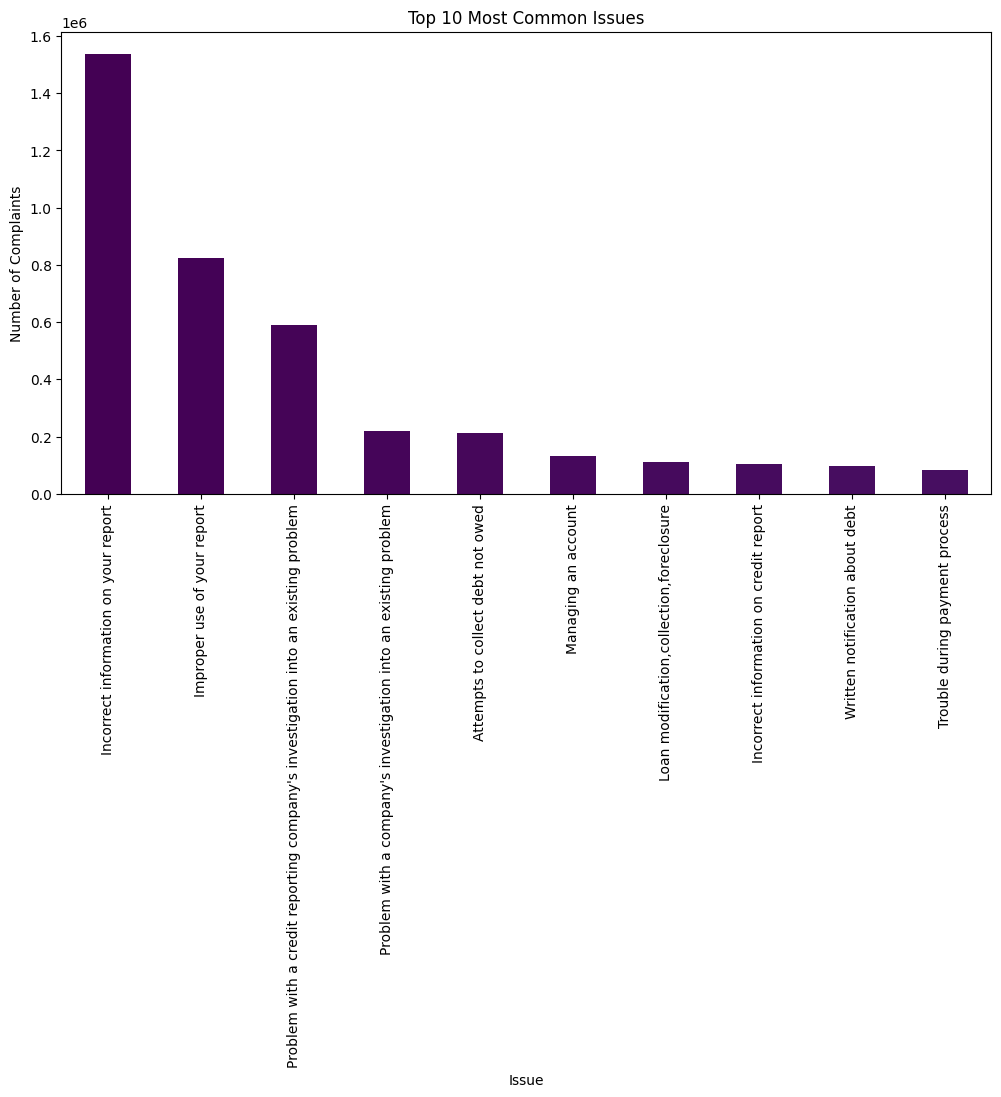

In [44]:
issue_counts = df['Issue'].value_counts().head(10)
cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in range(len(issue_counts))]
plt.figure(figsize=(12, 6))
issue_counts.plot(kind='bar', color=colors)
plt.title('Top 10 Most Common Issues')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.show()


**State-wise Complaint Distribution**

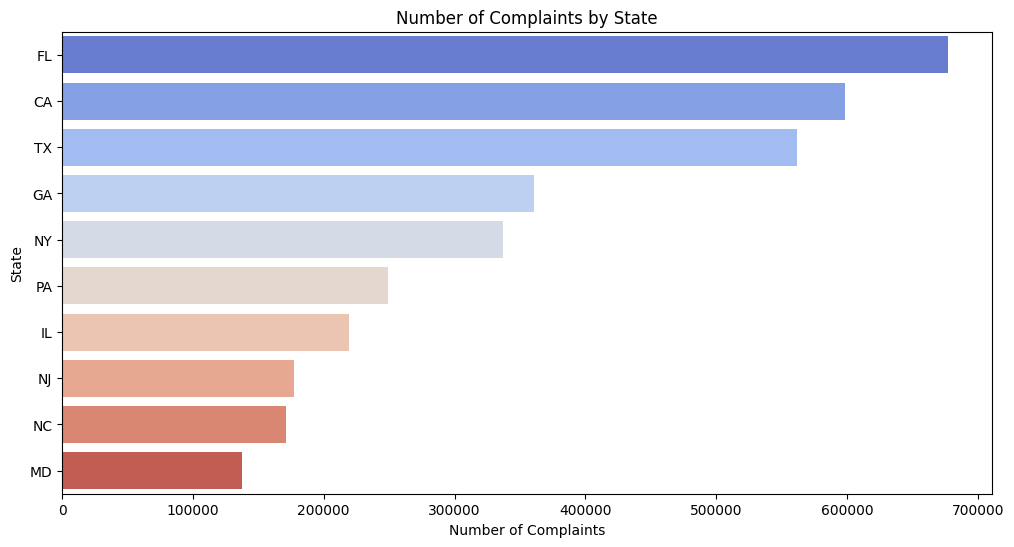

In [38]:
state_counts = df['State'].value_counts().head(10)
state_data = state_counts.reset_index()
state_data.columns = ['State', 'Number of Complaints']
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Complaints', y='State', data=state_data, hue='State', dodge=False, palette='coolwarm', legend=False)
plt.title('Number of Complaints by State')
plt.xlabel('Number of Complaints')
plt.ylabel('State')
plt.show()


**Company Response Time**

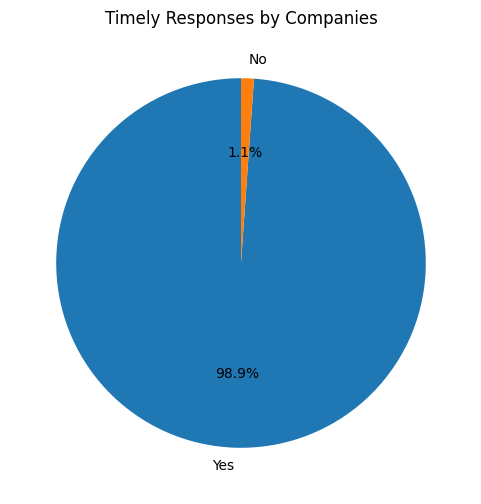

In [46]:
response_counts = df['Timely response?'].value_counts()
plt.figure(figsize=(6, 6))
response_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Timely Responses by Companies')
plt.ylabel('')
plt.show()


**Complaints by Submission Method**

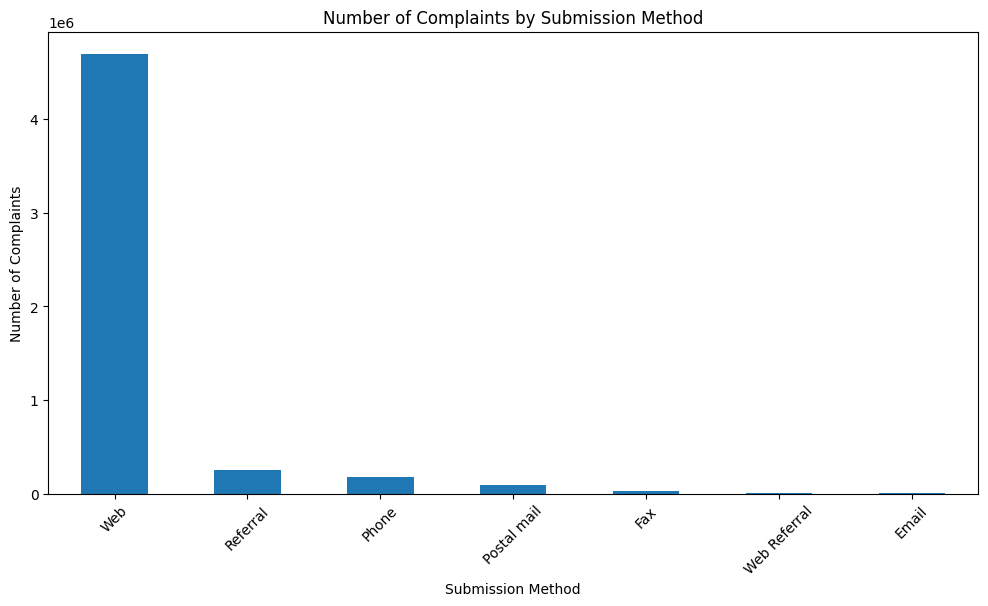

In [18]:
submission_counts = df['Submitted via'].value_counts()
plt.figure(figsize=(12, 6))
submission_counts.plot(kind='bar')
plt.title('Number of Complaints by Submission Method')
plt.xlabel('Submission Method')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


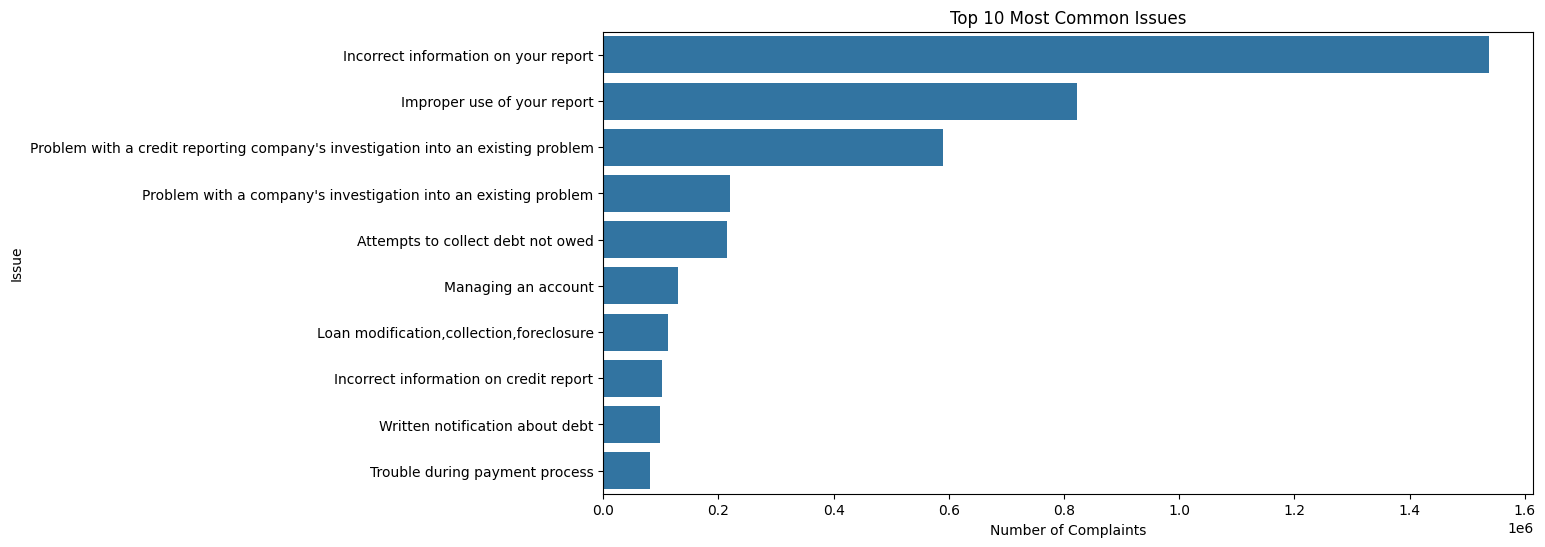

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
issue_counts = df['Issue'].value_counts().head(10)  # showing only Top 10 issues
plt.figure(figsize=(12, 6))
sns.barplot(x=issue_counts.values, y=issue_counts.index)
plt.title('Top 10 Most Common Issues')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.show()


**2. Given an unsorted array of integers, find the length of the longest continuous
increasing subsequence (subarray)**

In [1]:
def find_longest_increasing_subsequence(nums):
    if not nums:
        return 0

    max_length = 1
    current_length = 1

    for i in range(1, len(nums)):
        if nums[i] > nums[i-1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1

    return max_length


In [2]:
print(find_longest_increasing_subsequence([1,3,5,4,7]))
print(find_longest_increasing_subsequence([2,2,2,2,2]))


3
1


**3. Given a list of non negative integers, arrange them such that they form the largest number.**

In [3]:
from functools import cmp_to_key

def largest_number(nums):
    def compare(a, b):
        return int(b + a) - int(a + b)

    nums = list(map(str, nums))
    nums.sort(key=cmp_to_key(compare))
    return str(int(''.join(nums)))


In [4]:
print(largest_number([10,2]))
print(largest_number([3,30,34,5,9]))


210
9534330


**4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached
sample_json.json file using Python.**

In [5]:
import json
with open("/content/DT A1 sample_json (1) (1) (3).json") as f:
  dataset=json.load(f)

In [24]:
servlet_names=[]
servlet_classes=[]
for servlet in dataset['web-app']['servlet']:
    servlet_name = servlet['servlet-name']
    servlet_class = servlet['servlet-class']
    servlet_names.append(servlet_name)
    servlet_classes.append(servlet_class)



In [28]:
import pandas as pd
df=pd.DataFrame({"servlet_name":servlet_names,"servlet_class":servlet_classes})


In [30]:
df.to_csv("servlets.csv",index=False)